# Predictive Analysis and Pre-Processing
**created by mrpintime**









# Setup

In [2]:
import pandas as pd
import numpy as np

#subpress warnings
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn

# Preprocessing allows us to standarsize our data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Allows us to split our data into training and testing data and evaluate data on k-fold
from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
# evaluate Linear regression model
from sklearn.metrics import mean_squared_error
# import deep learning model
import tensorflow as tf


import matplotlib.pyplot as plt
%matplotlib inline

# Objectives
* Preprocessing dataset for predictive analysis
* Create traditional models
* Create Deep learning model  
> Extra step:
  * Apply PCA and perform Deep learning model
* Compare all models  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student Performance/Wrangling and EDA/pre-processed.csv')

In [5]:
df.isnull().sum().sum()

0

In [6]:
X_df = df.drop(columns=['G3'])
Y = df['G3']

In [7]:
Y = Y.to_numpy()

In [8]:
X_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3_bins,Pre_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,2.000000,3,4,1.000000,1.000000,3,2.000000,1,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,2.236068,3,3,1.000000,1.000000,3,1.414214,1,20
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,2.000000,3,2,1.414214,1.732051,3,2.449490,1,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,1.732051,2,2,1.000000,1.000000,5,0.000000,1,28
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,2.000000,3,2,1.000000,1.414214,5,0.000000,1,24


we need to change categorical variables to numeric variables

In [9]:
X_df.select_dtypes(include="O").describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


there is no ordinal variables therefore we use `get_dummies` or binary one hot encoder.

In [10]:
pd.get_dummies(X_df.select_dtypes(include="O")).columns

Index(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [11]:
X = pd.get_dummies(X_df)

In [12]:
X.isnull().sum().sum(), np.isnan(Y).sum()

(0, 0)

Split dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=432)

In [24]:
# X_train

To prevent data leakage we fit scaler on train set

In [25]:
# standardaize and normalize
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train.reshape(-1,1))
y_test = y_scaler.transform(y_test.reshape(-1,1))

In [16]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((314, 58), (314, 1), (730, 58), (730, 1))

# Linear regreassion

### Polynomial Regression

In [17]:
mse_list = []
r2_list = []

In [18]:
# x_train, x_test, = train_test_split(X, test_size=0.2, random_state=4)

In [19]:
mse_poly = []
r2_poly = []
Xpoly_scaler = StandardScaler()
for i in range(2,4):
    print(f'Degree {i}')
    X_poly = PolynomialFeatures(degree=i).fit_transform(X)
    x_train, x_test = train_test_split(X_poly, test_size=0.3, random_state=432)
    x_train = Xpoly_scaler.fit_transform(x_train)
    x_test = Xpoly_scaler.transform(x_test)
    print(f"test set: {x_test.shape}, {y_test.shape}")
    print(f"train set: {x_train.shape}, {y_train.shape}")
    ml_poly = LinearRegression()
    ml_poly.fit(x_train, y_train)
    score = ml_poly.score(x_test, y_test)
    mse = mean_squared_error(y_pred=ml_poly.predict(x_test), y_true=y_test)
    mse_poly.append(mse)
    r2_poly.append(score)
    print(f'Mean Square Error: {mse}, R2_Score: {score}')
    print('-------------------------------')

mse_list.append(mse_poly)
r2_list.append(r2_poly)

Degree 2
test set: (314, 1770), (314, 1)
train set: (730, 1770), (730, 1)
Mean Square Error: 8.175626748405478e+18, R2_Score: -7.630876494421489e+18
-------------------------------
Degree 3
test set: (314, 35990), (314, 1)
train set: (730, 35990), (730, 1)
Mean Square Error: 0.7496393612959689, R2_Score: 0.3003098652317735
-------------------------------


In [20]:
# degree 4 and 5 will have to much fetures and need more resourse for computing

### Multiple Linear Regression

In [21]:
mlr = LinearRegression()
print(f"test set: {X_test.shape}, {y_test.shape}")
print(f"train set: {X_train.shape}, {y_train.shape}")
mlr.fit(X_train, y_train)
score = mlr.score(X_test, y_test)
mse = mean_squared_error(y_pred=mlr.predict(X_test), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

mse_list.append(mse)
r2_list.append(score)

test set: (314, 58), (314, 1)
train set: (730, 58), (730, 1)
Mean Square Error: 0.39912529601404895, R2_Score: 0.6274688249097681


## Gride Search

### Ridge and Polynomial Regression

**degree 4 and above need high power chipset to implementing the polynomial and Grid Search**

In [26]:
parameters = {'alpha':[x for x in np.arange(0.1,9, 0.5)], 'solver':['auto']}
mse_ridge_poly = []
r2_ridge_poly = []
for i in range(2,4):
    print(f'Degree {i}')
    X_poly = PolynomialFeatures(degree=i).fit_transform(X)
    x_train, x_test = train_test_split(X_poly, test_size=0.3, random_state=432)
    x_train = Xpoly_scaler.fit_transform(x_train)
    x_test = Xpoly_scaler.transform(x_test)
    print(f"test set: {x_test.shape}, {y_test.shape}")
    print(f"train set: {x_train.shape}, {y_train.shape}")
    ml_ridge = Ridge()
    ridge_grid = GridSearchCV(ml_ridge, parameters, cv=5)
    ridge_grid.fit(x_train, y_train)
    score = ridge_grid.score(x_test, y_test)
    mse = mean_squared_error(y_pred=ridge_grid.predict(x_test), y_true=y_test)
    mse_ridge_poly.append(mse)
    r2_ridge_poly.append(score)
    print(f'Mean Square Error: {mse}, R2_Score: {score}')
    print(f'best parameters: {ridge_grid.best_params_}, and best result: {ridge_grid.best_score_}')
    print('-------------------------------')

mse_list.append(mse_ridge_poly)
r2_list.append(r2_ridge_poly)

Degree 2
test set: (314, 1770), (314, 1)
train set: (730, 1770), (730, 1)
Mean Square Error: 0.7011314440237468, R2_Score: 0.34558565106411154
best parameters: {'alpha': 8.6, 'solver': 'auto'}, and best result: 0.1693284872286777
-------------------------------
Degree 3
test set: (314, 35990), (314, 1)
train set: (730, 35990), (730, 1)
Mean Square Error: 0.6770562337296094, R2_Score: 0.36805670582057015
best parameters: {'alpha': 8.6, 'solver': 'auto'}, and best result: 0.21436958938503867
-------------------------------


### Ridge Regression

In [27]:
parameters = {'alpha':[x for x in np.arange(0.1,9, 0.5)], 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
print(f"test set: {X_test.shape}, {y_test.shape}")
print(f"train set: {X_train.shape}, {y_train.shape}")
ml_ridge = Ridge()
ridge_grid = GridSearchCV(ml_ridge, parameters, cv=5)
ridge_grid.fit(X_train, y_train)
score = ridge_grid.score(X_test, y_test)
mse = mean_squared_error(y_pred=ridge_grid.predict(X_test), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')
print(f'best parameters: {ridge_grid.best_params_}, and best result: {ridge_grid.best_score_}')

mse_list.append(mse)
r2_list.append(score)

test set: (314, 58), (314, 1)
train set: (730, 58), (730, 1)
Mean Square Error: 0.398643386529198, R2_Score: 0.6279186242797191
best parameters: {'alpha': 8.6, 'solver': 'saga'}, and best result: 0.5591979313008826


### Cross-Val and Multiple Regression

In [30]:
ml_for_cross = LinearRegression()
score = cross_val_score(ml_for_cross, X, Y, cv=5, scoring='r2')
print(score)
print('Average of scores: %.2f' % score.mean())

[ 0.10367143 -0.38638494  0.56162702  0.63556938  0.49604984]
Average of scores: 0.28


# review models

***you can see cross val result in line above***

In [31]:
models = ['Polynomial Regression', 'Multiple Linear Regression', 'Ridge and Polynomial Regression', 'Ridge Regression']

In [36]:
model_2 = pd.DataFrame({'result':[mse_list[1], r2_list[1]]}, index=['MSE', 'R2'])

In [37]:
model_3 = pd.DataFrame({'Degree 2':[mse_list[2][0], r2_list[2][0]], 'Degree 3':[mse_list[2][1], r2_list[2][1]]}, index=['MSE', 'R2'])

In [43]:
model_4 = pd.DataFrame({'result':[mse_list[3][0], r2_list[3][0]]}, index=['MSE', 'R2'])

Text(0.5, 0.98, 'Results of 3 Models')

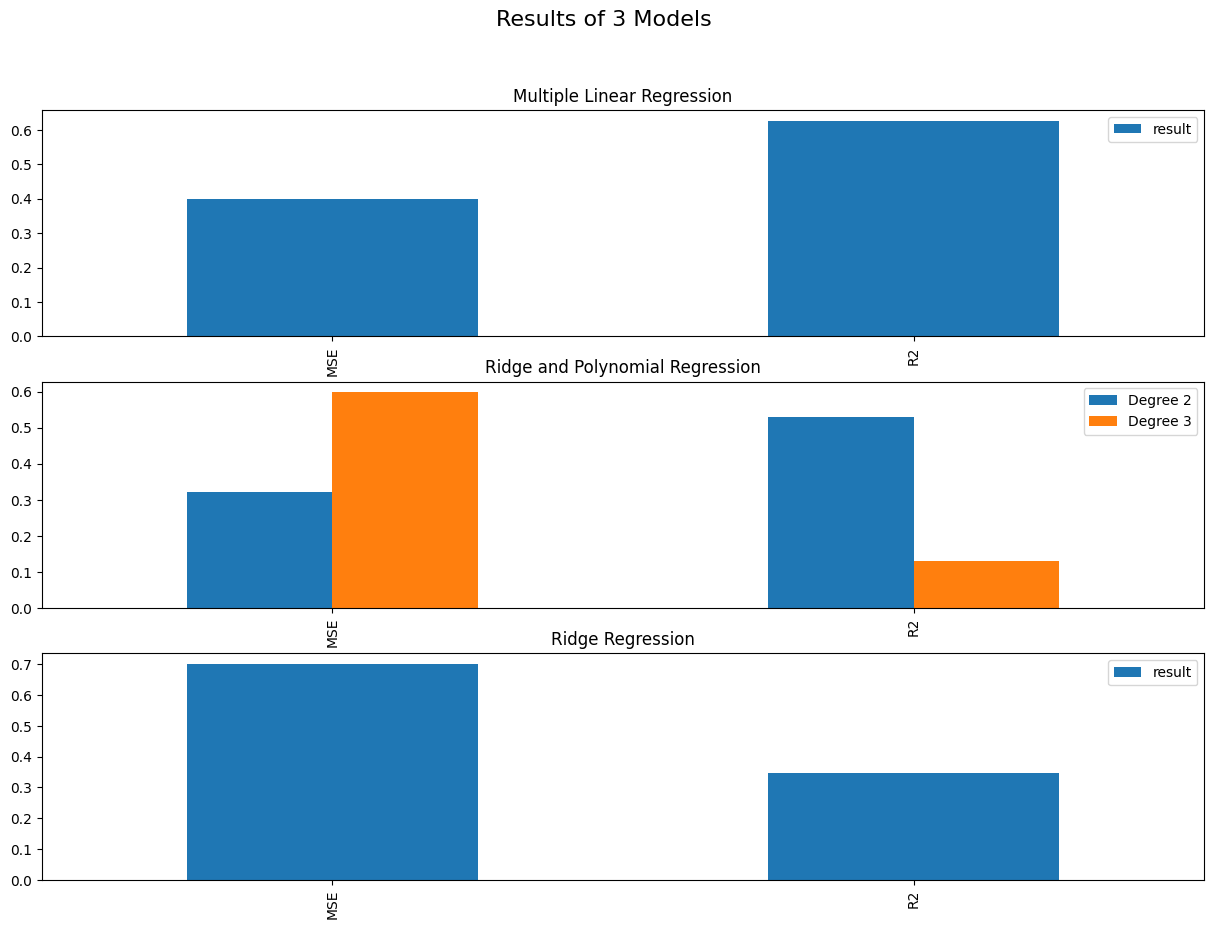

In [53]:
fig = plt.figure(figsize=(15,10))
# model_1['Degree 2'].plot(kind='bar', title='Polynomial Regression', ax=fig.add_subplot(221))
model_2.plot(kind='bar', title='Multiple Linear Regression', ax=fig.add_subplot(311))
model_3.plot(kind='bar', title='Ridge and Polynomial Regression', ax=fig.add_subplot(312))
model_4.plot(kind='bar', title='Ridge Regression', ax=fig.add_subplot(313))

fig.suptitle('Results of 3 Models', fontsize=16)

# Done